In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pylab as plt
import time
from IPython import display


a:  [0 1 0 1 1 1]

mu, c 0 0
[[ 0.18709855  0.        ]
 [-0.12785456  0.        ]]

mu, c 1 1
[[ 0.18709855 -0.14170366]
 [-0.12785456  0.41424891]]

mu, c 0 2
[[ 0.52861541 -0.14170366]
 [ 0.00111371  0.41424891]]

mu, c 1 3
[[ 0.52861541  0.89944324]
 [ 0.00111371  1.09908324]]

mu, c 1 4
[[  5.28615411e-01   1.89455526e+00]
 [  1.11371268e-03   1.83856955e+00]]

mu, c 1 5
[[  5.28615411e-01   2.55948263e+00]
 [  1.11371268e-03   2.44099325e+00]]


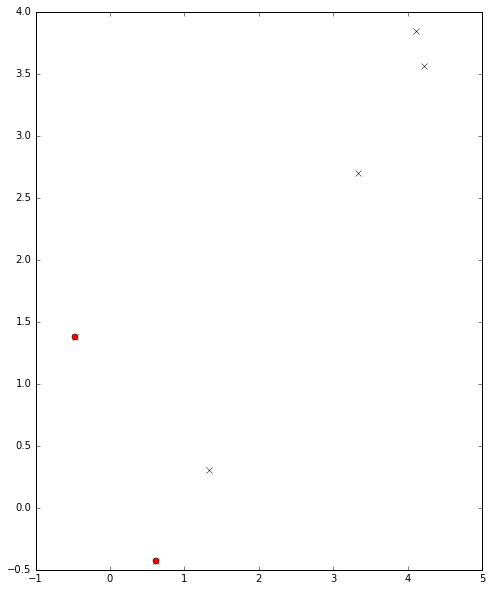

In [29]:

N = 6
D = 2
X1 = np.random.randn(D,N/2)
X2 = 0.8*np.random.randn(D,N/2) + 3*np.ones((D, N/2))

X = np.hstack((np.mat(X1), np.mat(X2)))

#plt.plot(X[0,:], X[1,:],'x')
#plt.show()

K = 2;

W = np.mat('[3,0;0,1]')
mu = X[:,0:K]
#plt.plot(mu[0,:],mu[1,:],'ro')

EP = 200

fig = plt.figure(figsize=(8,10))
plt.plot(X[0,:], X[1,:],'kx')

ax = fig.gca()
ln = plt.Line2D(xdata=mu[0,:], ydata=mu[1,:], marker='o', color='r',linestyle=None,linewidth=0)
ax.add_line(ln)

eta = 0.3
#print X
#print mu

dist = np.zeros((N,K))
for i in range(N):
    for c in range(K):
        err = X[:,i]-mu[:,c]
        dist[i,c] = float(err.T*W.I*err)
#         print
#         print "i, c", i, c
#         print dist

a = np.argmin(dist, axis=1)
print "a: ", a

mu = np.mat(np.zeros((D,K)))
count = np.zeros((K))
for i,c in enumerate(a):
    # count[c] += 1
    #mu[:,c] = (count[c]-1)/count[c]*mu[:,c] + 1/count[c]*X[:,i]
    mu[:,c] = (1-eta)*mu[:,c] + eta*X[:,i]
    print "\nmu, c", c, i
    print mu

# ------------

for e in range(0):
    
    dist = np.zeros((N,K))
    for i in range(N):
        for c in range(K):
            err = X[:,i]-mu[:,c]
            dist[i,c] = float(err.T*W.I*err)
    
    # Assignments
    a = np.argmin(dist, axis=1)
    
    mu = np.mat(np.zeros((D,K)))
    count = np.zeros((K))
    for i,c in enumerate(a):
        count[c] += 1
        #mu[:,c] = (count[c]-1)/count[c]*mu[:,c] + 1/count[c]*X[:,i]
        mu[:,c] = (1-eta)*mu[:,c] + eta*X[:,i]
    
    ln.set_xdata(mu[0,:])
    ln.set_ydata(mu[1,:])
    
    #plt.subplot(EP,1,e+1)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)
    plt.plot(X[0,:], X[1,:],'kx')
    #plt.plot(mu[0,:],mu[1,:],'ro')

plt.show()
    

In [19]:
a = np.mat([ [4, 2, 7], [0, 7, 1], [9, 3, 2] ])
a

matrix([[4, 2, 7],
        [0, 7, 1],
        [9, 3, 2]])

In [23]:
np.argmin(a, axis=1)

matrix([[1],
        [0],
        [2]])